In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sn
import matplotlib.pyplot as plt
import datetime
from calendar import month_abbr
from collections import OrderedDict


np.set_printoptions(suppress=True)

# dictionaries to store the date and the statistical measurements
wifiStr100m = {}
wifiStr1km = {}
cellularStr100m = {}
cellularStr1km = {}
broadbandSpd100m = {}
# broadbandSpd1km = {}
months = []
# detailed
Dspeed2GHz = {}
Dspeed5GHz = {}
Dspeed2G = {}
Dspeed3G = {}
Dspeed4G = {}
Uspeed2GHz = {}
Uspeed5GHz = {}
Uspeed2G = {}
Uspeed3G = {}
Uspeed4G = {}
ping2GHz = {}
ping5GHz = {}
ping2G = {}
ping3G = {}
ping4G = {}
signal2GHz = {}
signal5GHz = {}
signal2G = {}
signal3G = {}
signal4G = {}
signalOpened = {}
signalClosed = {}
Freq2412 = {}
Freq2437 = {}
Freq2452 = {}
Freq2462 = {}
Freq2472 = {}
Freq5180 = {}
Freq5220 = {}

In [2]:
# to compute the weighted average between the value of measurements and number of measurements
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [3]:
def analizeSpeed(broadbandData, year, month):
    
# Spread data in Wifi and Cellular
    df = pd.DataFrame(broadbandData)
    mask = df[3] == "Wifi"
    Wifi = df[mask]
    Cellular = df[~mask]
        
# Spread Wifi data in 2.4GHz ann 5GHz
    df2 = pd.DataFrame(Wifi)
    Wifi2Ghz = df2[df2[4] == "2.4 GHz"]
    Wifi5Ghz = df2[df2[4] == "5 GHz"]
    
# Spread Cellular in 2G, 3G and 4G
    df3 = pd.DataFrame(Cellular)
    Cellular2G = df3[df3[4] == "2G"]
    Cellular3G = df3[df3[4] == "3G"]
    Cellular4G = df3[df3[4] == "4G"]
        
# For each section compute the min/max, mean, standard deviation, median and quartiles
    key = datetime.datetime(year, month, 1)
    
    # WiFi 2.4GHz
    mean = w_avg(Wifi2Ghz, 5, 8)
    download = np.array(Wifi2Ghz[5])
    download = np.sort(download)
    value = (mean, download.std(), download.min(), download.max(), 
             np.percentile(download, 25), np.median(download), np.percentile(download, 75))
    Dspeed2GHz[key] = value

    mean = w_avg(Wifi2Ghz, 6, 8)
    upload = np.array(Wifi2Ghz[6])
    upload = np.sort(upload)
    value = (mean, upload.std(), upload.min(), upload.max(), 
             np.percentile(upload, 25), np.median(upload), np.percentile(upload, 75))
    Uspeed2GHz[key] = value

    mean = w_avg(Wifi2Ghz, 7, 8)
    ping = np.array(Wifi2Ghz[7])
    ping = np.sort(ping)
    value = (mean, ping.std(), ping.min(), ping.max(), 
             np.percentile(ping, 25), np.median(ping), np.percentile(ping, 75))
    ping2GHz[key] = value

    # WiFi 5GHz
    mean = w_avg(Wifi5Ghz, 5, 8)
    download = np.array(Wifi5Ghz[5])
    download = np.sort(download)
    value = (mean, download.std(), download.min(), download.max(), 
             np.percentile(download, 25), np.median(download), np.percentile(download, 75))
    Dspeed5GHz[key] = value

    mean = w_avg(Wifi5Ghz, 6, 8)
    upload = np.array(Wifi5Ghz[6])
    upload = np.sort(upload)
    value = (mean, upload.std(), upload.min(), upload.max(), 
             np.percentile(upload, 25), np.median(upload), np.percentile(upload, 75))
    Uspeed5GHz[key] = value

    mean = w_avg(Wifi5Ghz, 7, 8)
    ping = np.array(Wifi5Ghz[7])
    ping = np.sort(ping)
    value = (ping.mean(), ping.std(), ping.min(), ping.max(), 
             np.percentile(ping, 25), np.median(ping), np.percentile(ping, 75))
    ping5GHz[key] = value

    # Cellular 2G
    mean = w_avg(Cellular2G, 5, 8)
    download = np.array(Cellular2G[5])
    download = np.sort(download)
    value = (mean, download.std(), download.min(), download.max(), 
             np.percentile(download, 25), np.median(download), np.percentile(download, 75))
    Dspeed2G[key] = value

    mean = w_avg(Cellular2G, 6, 8)
    upload = np.array(Cellular2G[6])
    upload = np.sort(upload)
    value = (mean, upload.std(), upload.min(), upload.max(), 
             np.percentile(upload, 25), np.median(upload), np.percentile(upload, 75))
    Uspeed2G[key] = value

    mean = w_avg(Cellular2G, 7, 8)
    ping = np.array(Cellular2G[7])
    ping = np.sort(ping)
    value = (mean, ping.std(), ping.min(), ping.max(), 
             np.percentile(ping, 25), np.median(ping), np.percentile(ping, 75))
    ping2G[key] = value

    # Cellular 3G
    mean = w_avg(Cellular3G, 5, 8)
    download = np.array(Cellular3G[5])
    download = np.sort(download)
    value = (mean, download.std(), download.min(), download.max(), 
             np.percentile(download, 25), np.median(download), np.percentile(download, 75))
    Dspeed3G[key] = value

    mean = w_avg(Cellular3G, 6, 8)
    upload = np.array(Cellular3G[6])
    upload = np.sort(upload)
    value = (mean, upload.std(), upload.min(), upload.max(), 
             np.percentile(upload, 25), np.median(upload), np.percentile(upload, 75))
    Uspeed3G[key] = value

    mean = w_avg(Cellular3G, 7, 8)
    ping = np.array(Cellular3G[7])
    ping = np.sort(ping)
    value = (mean, ping.std(), ping.min(), ping.max(), 
             np.percentile(ping, 25), np.median(ping), np.percentile(ping, 75))
    ping3G[key] = value

    # Cellular 4G
    mean = w_avg(Cellular4G, 5, 8)
    download = np.array(Cellular4G[5])
    download = np.sort(download)
    value = (mean, download.std(), download.min(), download.max(), 
             np.percentile(download, 25), np.median(download), np.percentile(download, 75))
    Dspeed4G[key] = value

    mean = w_avg(Cellular4G, 6, 8)
    upload = np.array(Cellular4G[6])
    upload = np.sort(upload)
    value = (mean, upload.std(), upload.min(), upload.max(), 
             np.percentile(upload, 25), np.median(upload), np.percentile(upload, 75))
    Uspeed4G[key] = value

    mean = w_avg(Cellular4G, 7, 8)
    ping = np.array(Cellular4G[7])
    ping = np.sort(ping)
    value = (mean, ping.std(), ping.min(), ping.max(), 
             np.percentile(ping, 25), np.median(ping), np.percentile(ping, 75))
    ping4G[key] = value

In [4]:
def analizeSignal(signalData, year, month):
    
    df = pd.DataFrame(signalData)
    key = datetime.datetime(year, month, 1)
    
    if df[3][0] == "2.4 GHz" or df[3][0] == "5 GHz":
        Wifi2Ghz = df[df[3] == "2.4 GHz"]
        Wifi5Ghz = df[df[3] == "5 GHz"]
        
#       WiFi 2.4GHz
        mean = w_avg(Wifi2Ghz, 6, 8)
        signalStrength = np.array(Wifi2Ghz[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi2Ghz[7]])/len(Wifi2Ghz[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        signal2GHz[key] = value
    
#       WiFi 5GHz
        mean = w_avg(Wifi5Ghz, 6, 8)
        signalStrength = np.array(Wifi5Ghz[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi5Ghz[7]])/len(Wifi5Ghz[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        signal5GHz[key] = value
        
#       Opened vs Closed Wifi
        WifiOpened = df[df[5] == "Opened"]
        WifiClosed = df[df[5] == "Closed"]

#       Opened Wifi
        mean = w_avg(WifiOpened, 6, 8)
        signalStrength = np.array(WifiOpened[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in WifiOpened[7]])/len(WifiOpened[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        signalOpened[key] = value

#       Closed Wifi
        mean = w_avg(WifiClosed, 6, 8)
        signalStrength = np.array(WifiClosed[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in WifiClosed[7]])/len(WifiClosed[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        signalClosed[key] = value

#       Frequencies
        Wifi2412 = df[df[4] == "2412 MHz"]
        Wifi2437 = df[df[4] == "2437 MHz"]
        Wifi2452 = df[df[4] == "2452 MHz"]
        Wifi2462 = df[df[4] == "2462 MHz"]
        Wifi2472 = df[df[4] == "2472 MHz"]
        Wifi5180 = df[df[4] == "5180 MHz"]
        Wifi5220 = df[df[4] == "5220 MHz"]
        
#       2412 MHz
        mean = w_avg(Wifi2412, 6, 8)
        signalStrength = np.array(Wifi2412[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi2412[7]])/len(Wifi2412[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        Freq2412[key] = value
        
#       2437 MHz
        mean = w_avg(Wifi2437, 6, 8)
        signalStrength = np.array(Wifi2437[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi2437[7]])/len(Wifi2437[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        Freq2437[key] = value
        
#       2452 MHz
        mean = w_avg(Wifi2452, 6, 8)
        signalStrength = np.array(Wifi2452[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi2452[7]])/len(Wifi2452[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        Freq2452[key] = value
        
#       2462 MHz
        mean = w_avg(Wifi2462, 6, 8)
        signalStrength = np.array(Wifi2462[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi2462[7]])/len(Wifi2462[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        Freq2462[key] = value
        
#       2472 MHz
        mean = w_avg(Wifi2472, 6, 8)
        signalStrength = np.array(Wifi2472[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi2472[7]])/len(Wifi2472[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        Freq2472[key] = value
        
#       5180 MHz
        mean = w_avg(Wifi5180, 6, 8)
        signalStrength = np.array(Wifi5180[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi5180[7]])/len(Wifi5180[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        Freq5180[key] = value
        
#       5220 MHz
        mean = w_avg(Wifi5220, 6, 8)
        signalStrength = np.array(Wifi5220[6])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Wifi5220[7]])/len(Wifi5220[7]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        Freq5220[key] = value
        
    else:
        Cellular2G = df[df[3] == "2G"]
        Cellular3G = df[df[3] == "3G"]
        Cellular4G = df[df[3] == "4G"]
        
#       Cellular 2G
        mean = w_avg(Cellular2G, 4, 6)
        signalStrength = np.array(Cellular2G[4])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Cellular2G[5]])/len(Cellular2G[5]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        signal2G[key] = value
    
#       Cellular 3G
        mean = w_avg(Cellular3G, 4, 6)
        signalStrength = np.array(Cellular3G[4])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Cellular3G[5]])/len(Cellular3G[5]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        signal3G[key] = value
        
#       Cellular 4G
        mean = w_avg(Cellular4G, 4, 6)
        signalStrength = np.array(Cellular4G[4])
        signalStrength = np.sort(signalStrength)
        std = math.sqrt(sum([x*2 for x in Cellular4G[5]])/len(Cellular4G[5]))
        value = (mean, std, signalStrength.min(), signalStrength.max(), 
                 np.percentile(signalStrength, 25), np.median(signalStrength), np.percentile(signalStrength, 75))
        signal4G[key] = value 

In [5]:
# import the data
for j in range(8,12):
    if j < 10:
        wifi100m = pd.read_csv(".\\Data\\2016-0"+ str(j) +"\\OD_EU_Wifi_100m.csv", header=None, engine='python')
        wifi1km  = pd.read_csv(".\\Data\\2016-0"+ str(j) +"\\OD_EU_Wifi_1km.csv", header=None, engine='python')
        cellular100m = pd.read_csv(".\\Data\\2016-0"+ str(j) +"\\OD_EU_Cellular_100m.csv", header=None, engine='python')
        cellular1km  = pd.read_csv(".\\Data\\2016-0"+ str(j) +"\\OD_EU_Cellular_1km.csv", header=None, engine='python')
        broadband100m = pd.read_csv(".\\Data\\2016-0"+ str(j) +"\\OD_EU_Broadband_100m.csv", header=None, engine='python')
    else:
        wifi100m = pd.read_csv(".\\Data\\2016-"+ str(j) +"\\OD_EU_Wifi_100m.csv", header=None, engine='python')
        wifi1km  = pd.read_csv(".\\Data\\2016-"+ str(j) +"\\OD_EU_Wifi_1km.csv", header=None, engine='python')
        cellular100m = pd.read_csv(".\\Data\\2016-"+ str(j) +"\\OD_EU_Cellular_100m.csv", header=None, engine='python')
        cellular1km  = pd.read_csv(".\\Data\\2016-"+ str(j) +"\\OD_EU_Cellular_1km.csv", header=None, engine='python')
        broadband100m = pd.read_csv(".\\Data\\2016-"+ str(j) +"\\OD_EU_Broadband_100m.csv", header=None, engine='python')
        
    analizeSpeed(broadband100m, 2016, j)
    analizeSignal(cellular100m, 2016, j)
    analizeSignal(wifi100m, 2016, j)

In [6]:
# import the data
for i in range(2017,2021):
    for j in range(1,13):
        if j < 10:
            wifi100m = pd.read_csv(".\\Data\\"+ str(i) +"-0"+ str(j) +"\\OD_EU_Wifi_100m.csv", header=None, engine='python')
            wifi1km  = pd.read_csv(".\\Data\\"+ str(i) +"-0"+ str(j) +"\\OD_EU_Wifi_1km.csv", header=None, engine='python')
            cellular100m = pd.read_csv(".\\Data\\"+ str(i) +"-0"+ str(j) +"\\OD_EU_Cellular_100m.csv", header=None, engine='python')
            cellular1km  = pd.read_csv(".\\Data\\"+ str(i) +"-0"+ str(j) +"\\OD_EU_Cellular_1km.csv", header=None, engine='python')
            broadband100m = pd.read_csv(".\\Data\\"+ str(i) +"-0"+ str(j) +"\\OD_EU_Broadband_100m.csv", header=None, engine='python')
#             broadband1km = pd.read_csv(".\\Data\\"+ str(i) +"-0"+ str(j) +"\\OD_EU_Broadband_1km.csv", header=None, engine='python')
        else:
            wifi100m = pd.read_csv(".\\Data\\"+ str(i) +"-"+ str(j) +"\\OD_EU_Wifi_100m.csv", header=None, engine='python')
            wifi1km  = pd.read_csv(".\\Data\\"+ str(i) +"-"+ str(j) +"\\OD_EU_Wifi_1km.csv", header=None, engine='python')
            cellular100m = pd.read_csv(".\\Data\\"+ str(i) +"-"+ str(j) +"\\OD_EU_Cellular_100m.csv", header=None, engine='python')
            cellular1km  = pd.read_csv(".\\Data\\"+ str(i) +"-"+ str(j) +"\\OD_EU_Cellular_1km.csv", header=None, engine='python')
            broadband100m = pd.read_csv(".\\Data\\"+ str(i) +"-"+ str(j) +"\\OD_EU_Broadband_100m.csv", header=None, engine='python')
#             broadband1km = pd.read_csv(".\\Data\\"+ str(i) +"-"+ str(j) +"\\OD_EU_Broadband_1km.csv", header=None, engine='python')

# compute the statistical measurements for each month
        analizeSpeed(broadband100m, i, j)
        analizeSignal(cellular100m, i, j)
        analizeSignal(wifi100m, i, j)

In [7]:
# import the data
for j in range(3,6,2):
    if j < 10:
        wifi100m = pd.read_csv(".\\Data\\2021-0"+ str(j) +"\\OD_EU_Wifi_100m.csv", header=None, engine='python')
        wifi1km  = pd.read_csv(".\\Data\\2021-0"+ str(j) +"\\OD_EU_Wifi_1km.csv", header=None, engine='python')
        cellular100m = pd.read_csv(".\\Data\\2021-0"+ str(j) +"\\OD_EU_Cellular_100m.csv", header=None, engine='python')
        cellular1km  = pd.read_csv(".\\Data\\2021-0"+ str(j) +"\\OD_EU_Cellular_1km.csv", header=None, engine='python')
        broadband100m = pd.read_csv(".\\Data\\2021-0"+ str(j) +"\\OD_EU_Broadband_100m.csv", header=None, engine='python')
    else:
        wifi100m = pd.read_csv(".\\Data\\2021-"+ str(j) +"\\OD_EU_Wifi_100m.csv", header=None, engine='python')
        wifi1km  = pd.read_csv(".\\Data\\2021-"+ str(j) +"\\OD_EU_Wifi_1km.csv", header=None, engine='python')
        cellular100m = pd.read_csv(".\\Data\\2021-"+ str(j) +"\\OD_EU_Cellular_100m.csv", header=None, engine='python')
        cellular1km  = pd.read_csv(".\\Data\\2021-"+ str(j) +"\\OD_EU_Cellular_1km.csv", header=None, engine='python')
        broadband100m = pd.read_csv(".\\Data\\2021-"+ str(j) +"\\OD_EU_Broadband_100m.csv", header=None, engine='python')
    
# compute the statistical measurements for each month
    analizeSpeed(broadband100m, 2021, j)
    analizeSignal(cellular100m, 2021, j)
    analizeSignal(wifi100m, 2021, j)

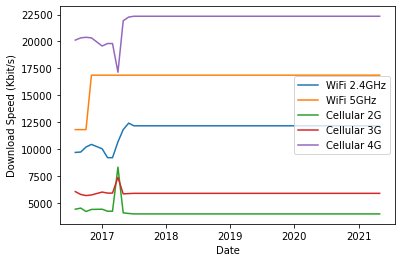

In [8]:
# Download speed for different technologies
strWifi2 = [a_tuple[0] for a_tuple in Dspeed2GHz.values()]
strWifi5 = [a_tuple[0] for a_tuple in Dspeed5GHz.values()]
strCel2G = [a_tuple[0] for a_tuple in Dspeed2G.values()]
strCel3G = [a_tuple[0] for a_tuple in Dspeed3G.values()]
strCel4G = [a_tuple[0] for a_tuple in Dspeed4G.values()]

# ploting the data
months = []
for key in Dspeed2GHz.keys():
    months.append(key)
   
plt.plot(months, strWifi2, label='WiFi 2.4GHz')
plt.plot(months, strWifi5, label='WiFi 5GHz')
plt.plot(months, strCel2G, label='Cellular 2G')
plt.plot(months, strCel3G, label='Cellular 3G')
plt.plot(months, strCel4G, label='Cellular 4G')

plt.xlabel("Date")
plt.ylabel("Download Speed (Kbit/s)")
plt.legend()

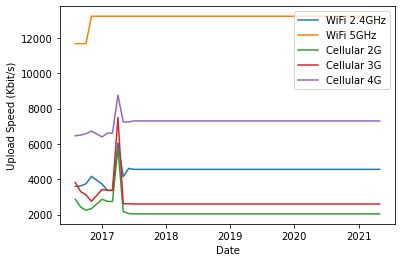

In [9]:
# Upload speed
strWifi2 = [a_tuple[0] for a_tuple in Uspeed2GHz.values()]
strWifi5 = [a_tuple[0] for a_tuple in Uspeed5GHz.values()]
strCel2G = [a_tuple[0] for a_tuple in Uspeed2G.values()]
strCel3G = [a_tuple[0] for a_tuple in Uspeed3G.values()]
strCel4G = [a_tuple[0] for a_tuple in Uspeed4G.values()]

months = []
for key in Uspeed2GHz.keys():
    months.append(key)
     
plt.plot(months, strWifi2, label='WiFi 2.4GHz')
plt.plot(months, strWifi5, label='WiFi 5GHz')
plt.plot(months, strCel2G, label='Cellular 2G')
plt.plot(months, strCel3G, label='Cellular 3G')
plt.plot(months, strCel4G, label='Cellular 4G')
plt.xlabel("Date")
plt.ylabel("Upload Speed (Kbit/s)")
plt.legend()

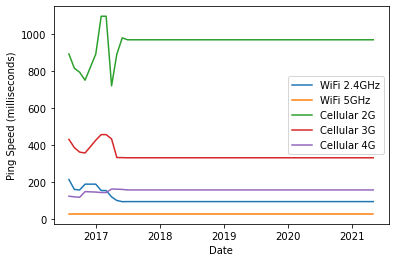

In [10]:
# Ping
strWifi2 = [a_tuple[0] for a_tuple in ping2GHz.values()]
strWifi5 = [a_tuple[0] for a_tuple in ping5GHz.values()]
strCel2G = [a_tuple[0] for a_tuple in ping2G.values()]
strCel3G = [a_tuple[0] for a_tuple in ping3G.values()]
strCel4G = [a_tuple[0] for a_tuple in ping4G.values()]

months = []
for key in Uspeed2GHz.keys():
    months.append(key)
     
plt.plot(months, strWifi2, label='WiFi 2.4GHz')
plt.plot(months, strWifi5, label='WiFi 5GHz')
plt.plot(months, strCel2G, label='Cellular 2G')
plt.plot(months, strCel3G, label='Cellular 3G')
plt.plot(months, strCel4G, label='Cellular 4G')
plt.xlabel("Date")
plt.ylabel("Ping Speed (milliseconds)")
plt.legend()

In [11]:
# remove outliers based on 1.5IQR
def removeOutliers(data):
    # calculate interquartile rang
    q25, q75, q50 = np.percentile(data, 10), np.percentile(data, 75), np.percentile(data, 50)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f, 50th=%.3f' % (q25, q75, iqr, q50))

    # calculate the outlier cutoff
    cut_off = iqr * 2
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    return outliers_removed

Percentiles: 25th=1286.300, 75th=18641.750, IQR=17355.450, 50th=8540.500
Identified outliers: 199
Non-outlier observations: 5645
Percentiles: 25th=1268.400, 75th=20587.000, IQR=19318.600, 50th=9192.000
Identified outliers: 110
Non-outlier observations: 3715


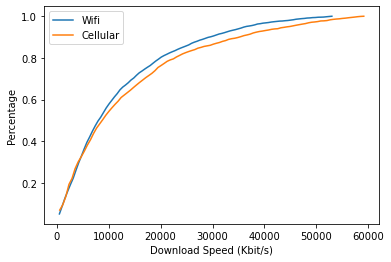

In [12]:
# Spread data in Wifi and Cellular
df = pd.DataFrame(broadband100m)
mask = df[3] == "Wifi"
Wifi = df[mask]
Cellular = df[~mask]

# getting Wi-Fi download speed for the histogram
data = [float(s) for s in Wifi[5]]
cleanData = removeOutliers(data)
count, bins_count = np.histogram(cleanData, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.xlabel("Download Speed (Kbit/s)")
plt.ylabel("Percentage")
plt.plot(bins_count[1:], cdf, label="Wifi")
plt.legend()

# getting Cellular download speed for the histogram
data = [float(s) for s in Cellular[5]]
cleanData = removeOutliers(data)
count, bins_count = np.histogram(cleanData, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

# plotting PDF and CDF
plt.plot(bins_count[1:], cdf, label="Cellular")
plt.legend()

Percentiles: 25th=409.300, 75th=8449.750, IQR=8040.450, 50th=2891.500
Identified outliers: 356
Non-outlier observations: 5488
Percentiles: 25th=263.800, 75th=6630.000, IQR=6366.200, 50th=2709.000
Identified outliers: 215
Non-outlier observations: 3610


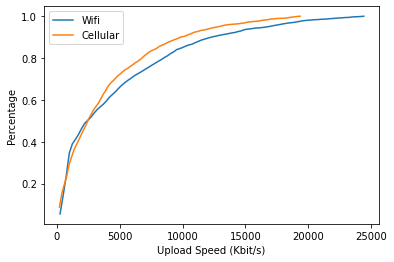

In [13]:
# getting Wi-Fi upload speed for the histogram
data = [float(s) for s in Wifi[6]]
cleanData = removeOutliers(data)
count, bins_count = np.histogram(cleanData, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.xlabel("Upload Speed (Kbit/s)")
plt.ylabel("Percentage")
plt.plot(bins_count[1:], cdf, label="Wifi")
plt.legend()

# getting Cellular upload speed for the histogram
data = [float(s) for s in Cellular[6]]
cleanData = removeOutliers(data)
count, bins_count = np.histogram(cleanData, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

# plotting PDF and CDF
plt.plot(bins_count[1:], cdf, label="Cellular")
plt.legend()

Percentiles: 25th=34.000, 75th=105.000, IQR=71.000, 50th=67.000
Identified outliers: 490
Non-outlier observations: 5354
Percentiles: 25th=51.000, 75th=151.000, IQR=100.000, 50th=93.000
Identified outliers: 547
Non-outlier observations: 3278


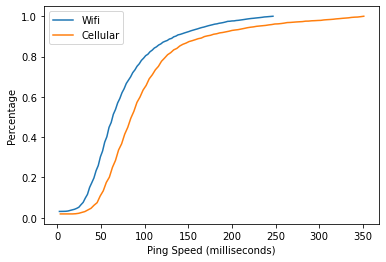

In [14]:
# getting Wi-Fi ping for the histogram
data = [float(s) for s in Wifi[7]]
cleanData = removeOutliers(data)
count, bins_count = np.histogram(cleanData, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.xlabel("Ping Speed (milliseconds)")
plt.ylabel("Percentage")
plt.plot(bins_count[1:], cdf, label="Wifi")
plt.legend()

# getting Cellular ping for the histogram
data = [float(s) for s in Cellular[7]]
cleanData = removeOutliers(data)
count, bins_count = np.histogram(cleanData, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

# plotting PDF and CDF
plt.plot(bins_count[1:], cdf, label="Cellular")
plt.legend()

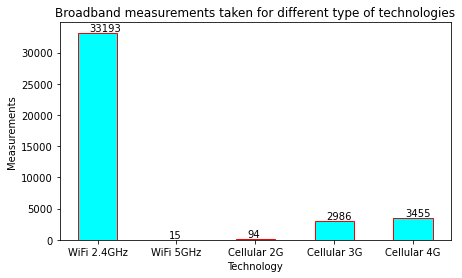

In [15]:
# Spread data in Wifi and Cellular
df = pd.DataFrame(broadband100m)
mask = df[3] == "Wifi"
Wifi = df[mask]
Cellular = df[~mask]

# Spread Wifi data in 2.4GHz ann 5GHz
df2 = pd.DataFrame(Wifi)
Wifi2Ghz = df2[df2[4] == "2.4 GHz"]
Wifi5Ghz = df2[df2[4] == "5 GHz"]

# Spread Cellular in 2G, 3G and 4G
df3 = pd.DataFrame(Cellular)
Cellular2G = df3[df3[4] == "2G"]
Cellular3G = df3[df3[4] == "3G"]
Cellular4G = df3[df3[4] == "4G"]

# compute the total number of speed measurements for each technology
technology = ['WiFi 2.4GHz', 'WiFi 5GHz', 'Cellular 2G', 'Cellular 3G', 'Cellular 4G']
measurements = [math.floor(sum(Wifi2Ghz[8])), math.floor(sum(Wifi5Ghz[8])),
                math.floor(sum(Cellular2G[8])), math.floor(sum(Cellular3G[8])), math.floor(sum(Cellular4G[8]))]

plt.figure(figsize = (7,4))

plt.bar(technology, measurements, width= 0.5, align='center',color='cyan', edgecolor = 'red')

# This is the location for the annotated text
i = 1.0
j = 300

# Annotating the bar plot with the values (total death count)
for i in range(len(technology)):
    plt.annotate(measurements[i], (-0.1 + i, measurements[i] + j))
    
plt.title("Broadband measurements taken for different type of technologies")
    
plt.xlabel("Technology")
plt.ylabel("Measurements")

plt.savefig('1BarPlot.png')

plt.show()

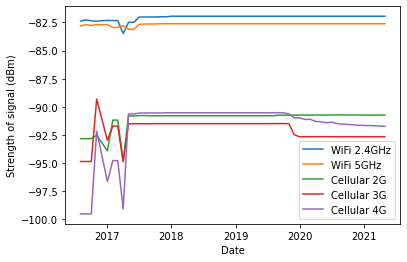

In [16]:
# Signal strength
strWifi2 = [a_tuple[0] for a_tuple in signal2GHz.values()]
strWifi5 = [a_tuple[0] for a_tuple in signal5GHz.values()]
strCel2G = [a_tuple[0] for a_tuple in signal2G.values()]
strCel3G = [a_tuple[0] for a_tuple in signal3G.values()]
strCel4G = [a_tuple[0] for a_tuple in signal4G.values()]

months = []
for key in Dspeed2GHz.keys():
    months.append(key)
    
plt.plot(months, strWifi2, label='WiFi 2.4GHz')
plt.plot(months, strWifi5, label='WiFi 5GHz')
plt.plot(months, strCel2G, label='Cellular 2G')
plt.plot(months, strCel3G, label='Cellular 3G')
plt.plot(months, strCel4G, label='Cellular 4G')
plt.xlabel("Date")
plt.ylabel("Strength of signal (dBm)")
plt.legend()

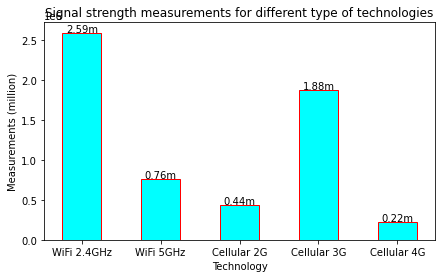

In [17]:
# Spread Wifi data in 2.4GHz ann 5GHz
df2 = pd.DataFrame(wifi100m)
Wifi2Ghz = df2[df2[3] == "2.4 GHz"]
Wifi5Ghz = df2[df2[3] == "5 GHz"]

# Spread Cellular in 2G, 3G and 4G
df3 = pd.DataFrame(cellular100m)
Cellular2G = df3[df3[3] == "2G"]
Cellular3G = df3[df3[3] == "3G"]
Cellular4G = df3[df3[3] == "4G"]

# compute the total number of signal strength measurements for each technology
technology = ['WiFi 2.4GHz', 'WiFi 5GHz', 'Cellular 2G', 'Cellular 3G', 'Cellular 4G']
measurements = [math.floor(sum(Wifi2Ghz[8])), math.floor(sum(Wifi5Ghz[8])),
                math.floor(sum(Cellular2G[6])), math.floor(sum(Cellular3G[6])), math.floor(sum(Cellular4G[6]))]

plt.figure(figsize = (7,4))

plt.bar(technology, measurements, width= 0.5, align='center',color='cyan', edgecolor = 'red')

# This is the location for the annotated text
i = 1.0
j = 10000

# Annotating the bar plot with the values (total death count)
for i in range(len(technology)):
    plt.annotate(str(round(measurements[i]/math.pow(10,6),2)) + 'm', (-0.2 + i, measurements[i] + j))
    
plt.title("Signal strength measurements for different type of technologies")
    
plt.xlabel("Technology")
plt.ylabel("Measurements (million)")

plt.savefig('1BarPlot.png')

plt.show()

Percentiles: 25th=-91.000, 75th=-80.000, IQR=11.000, 50th=-85.000
Identified outliers: 7162
Non-outlier observations: 710675
Percentiles: 25th=-104.000, 75th=-81.000, IQR=23.000, 50th=-92.000
Identified outliers: 80
Non-outlier observations: 166751


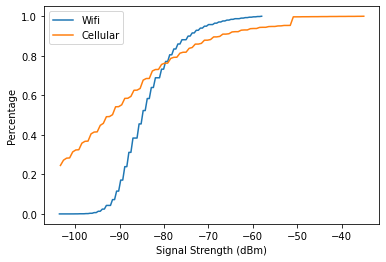

In [18]:
data = [float(s) for s in wifi100m[6]]
cleanData = removeOutliers(data)
count, bins_count = np.histogram(cleanData, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.xlabel("Signal Strength (dBm)")
plt.ylabel("Percentage")
plt.plot(bins_count[1:], cdf, label="Wifi")
plt.legend()

data = [float(s) for s in cellular100m[4]]
cleanData = removeOutliers(data)
count, bins_count = np.histogram(cleanData, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

# plotting PDF and CDF
plt.plot(bins_count[1:], cdf, label="Cellular")
plt.legend()

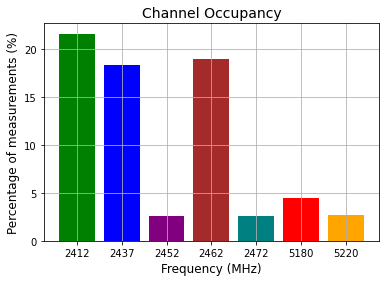

In [19]:
channelOccupancy = {}
total = sum(wifi100m[8])
remove = []

# compute the total number of measurements for every Wi-Fi frequency
for i in range(len(wifi100m[4])):
    channelOccupancy[wifi100m[4][i].replace(' MHz', '')] = 0

for i in range(len(wifi100m[4])):
    channelOccupancy[wifi100m[4][i].replace(' MHz', '')] += wifi100m[8][i]

# compute the percentage of measurements for each frequency and remove those less that 2.5%
for key in channelOccupancy.keys():
    channelOccupancy[key] = (channelOccupancy[key] / total) * 100
    if channelOccupancy[key] < 2.5:
        remove.append(key)

for key in remove:
    channelOccupancy.pop(key)
    
channelOccupancy2 = OrderedDict(sorted(channelOccupancy.items()))
        
labels= channelOccupancy2.keys()

sizes= channelOccupancy2.values()


New_Colors = ['green','blue','purple','brown','teal', 'red', 'orange']

plt.bar(labels, sizes, color=New_Colors)

plt.title('Channel Occupancy', fontsize=14)
plt.xlabel('Frequency (MHz)', fontsize=12)
plt.ylabel('Percentage of measurements (%)', fontsize=12)

plt.grid(True)

plt.show()

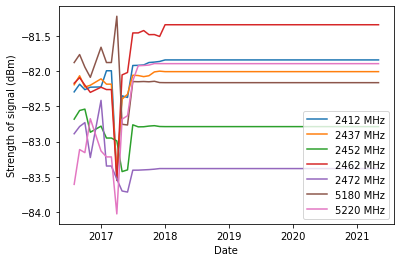

In [20]:
# Signal strength frequencies
strWifi2412 = [a_tuple[0] for a_tuple in Freq2412.values()]
strWifi2437 = [a_tuple[0] for a_tuple in Freq2437.values()]
strWifi2452 = [a_tuple[0] for a_tuple in Freq2452.values()]
strWifi2462 = [a_tuple[0] for a_tuple in Freq2462.values()]
strWifi2472 = [a_tuple[0] for a_tuple in Freq2472.values()]
strWifi5180 = [a_tuple[0] for a_tuple in Freq5180.values()]
strWifi5220 = [a_tuple[0] for a_tuple in Freq5220.values()]

months = []
for key in Freq2412.keys():
    months.append(key)
    
   
plt.plot(months, strWifi2412, label='2412 MHz')
plt.plot(months, strWifi2437, label='2437 MHz')
plt.plot(months, strWifi2452, label='2452 MHz')
plt.plot(months, strWifi2462, label='2462 MHz')
plt.plot(months, strWifi2472, label='2472 MHz')
plt.plot(months, strWifi5180, label='5180 MHz')
plt.plot(months, strWifi5220, label='5220 MHz')
plt.xlabel("Date")
plt.ylabel("Strength of signal (dBm)")
plt.legend()

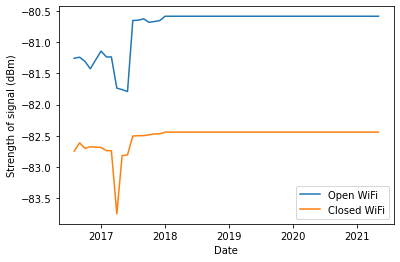

In [21]:
# Signal strength
strOpenedWifi = [a_tuple[0] for a_tuple in signalOpened.values()]
strClosedWifi = [a_tuple[0] for a_tuple in signalClosed.values()]

months = []
for key in Dspeed2GHz.keys():
    months.append(key)
    
   
plt.plot(months, strOpenedWifi, label='Open WiFi')
plt.plot(months, strClosedWifi, label='Closed WiFi')
plt.xlabel("Date")
plt.ylabel("Strength of signal (dBm)")
plt.legend()